In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import kruskal, f_oneway
from scipy.stats import wilcoxon, ttest_ind
from IPython.display import display

## Questionnaires Analysis

### Load UEQ Data

In [2]:
data_c1 = pd.read_excel("../Data/UEQ_DATA_C1.xlsx", sheet_name="Data", usecols=[i for i in range(26)])
data_c2 = pd.read_excel("../Data/UEQ_DATA_C2.xlsx", sheet_name="Data", usecols=[i for i in range(26)])
data_c3 = pd.read_excel("../Data/UEQ_DATA_C3.xlsx", sheet_name="Data", usecols=[i for i in range(26)])
data_list = [data_c1, data_c2, data_c3]

with open("../Data/Notes.txt") as f:
    lines = f.read().splitlines()
exp_labels = {}
for line in lines:
    line_split = line.split(',')
    exp_labels[line_split[0]] = line_split[1]

for i,label in enumerate(exp_labels):
    print("Experimental condition {0} ({1}) - Questionnaire data shape: {2}".format(label, exp_labels[label], data_list[i].shape))

Experimental condition C1 (Static Ghost Trajectory Interface) - Questionnaire data shape: (20, 26)
Experimental condition C2 (Static Final Pose Interface) - Questionnaire data shape: (20, 26)
Experimental condition C3 (Dynamic Anticipatory Trajectory Interface) - Questionnaire data shape: (20, 26)


### Define Categories and Group Questions

In [3]:
all_questions = set([i+1 for i in range(26)])
positive = set([1,2,6,7,8,11,13,14,15,16,20,22,26])
negative = all_questions - positive

attractiveness = set([1, 12, 14, 16, 24, 25])
perspicuity = set([2, 4, 13, 21])
efficiency = set([9, 20, 22, 23])
dependability = set([8, 11, 17, 19])
stimulation = set([5, 6, 7, 18])
novelty = set([3, 10, 15, 26])

categories = ["Attractiveness","Perspicuity","Efficiency","Dependability","Stimulation","Novelty"]
categories_list = [attractiveness, perspicuity, efficiency, dependability, stimulation, novelty]

### Normalize Data in [-3, 3]

In [4]:
normalized_list = []
for data in data_list:
    normalized = data.copy()
    normalized.iloc[:,[i-1 for i in positive]] -= 4
    normalized.iloc[:,[i-1 for i in negative]] = -normalized.iloc[:,[i-1 for i in negative]] + 4
    normalized_list.append(normalized)
    
for table in normalized_list:
    print(table.shape)

(20, 26)
(20, 26)
(20, 26)


### Determine Means for Each Category per Person

In [5]:
def group_scores_per_category(i):
    data = normalized_list[i]
    scale_means = np.empty([len(data), 6])
    for i in range(len(data)):
        values = data.iloc[i,:].values
        for j, cat in enumerate(categories_list):
            scale_means[i,j] = values[[k-1 for k in list(cat)]].mean()    
    return scale_means

scale_means_list = []
for i in range(len(normalized_list)):
    scale_means_list.append(group_scores_per_category(i))
    print(scale_means_list[i].shape)

(20, 6)
(20, 6)
(20, 6)


### Plots & Statistics

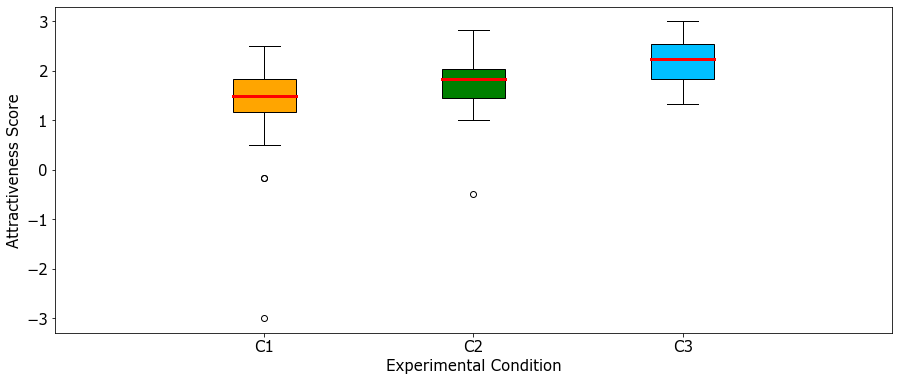

Statistical Results for Attractiveness score:

F_onewayResult(statistic=6.603364690018305, pvalue=0.002634142403723268)
-----------
C1 vs C2:
Ttest_indResult(statistic=-1.7191005936917878, pvalue=0.04686680288439099)
-----------
C1 vs C3:
Ttest_indResult(statistic=-3.3956856526954597, pvalue=0.0008079535100937239)
-----------
C2 vs C3:
Ttest_indResult(statistic=-2.245070213007767, pvalue=0.015331349242173185)

##################



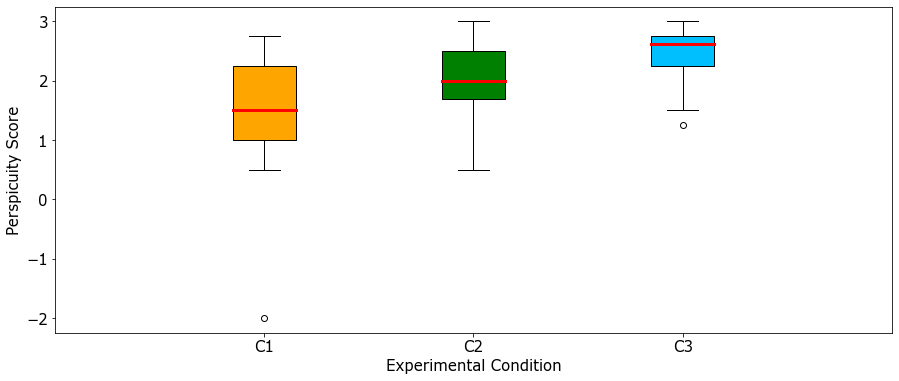

Statistical Results for Perspicuity score:

F_onewayResult(statistic=7.420301009064477, pvalue=0.001367380683379081)
-----------
C1 vs C2:
Ttest_indResult(statistic=-1.6125507446368286, pvalue=0.05755883857050036)
-----------
C1 vs C3:
Ttest_indResult(statistic=-3.668384259226545, pvalue=0.00037252126562867347)
-----------
C2 vs C3:
Ttest_indResult(statistic=-2.580871319431891, pvalue=0.006920423578680137)

##################



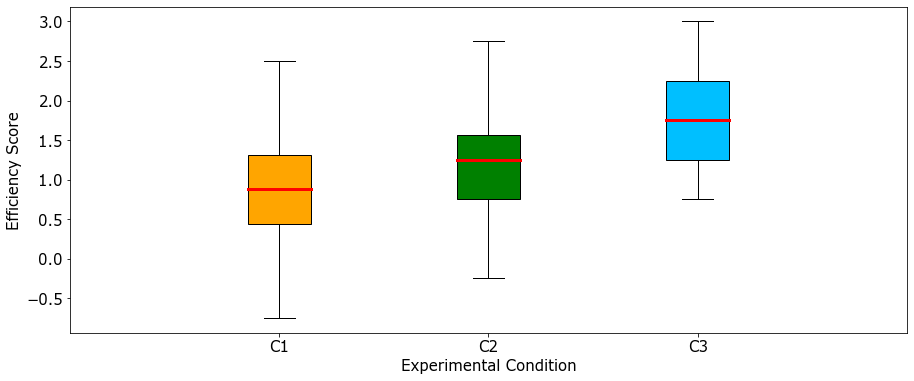

Statistical Results for Efficiency score:

F_onewayResult(statistic=6.649620455453456, pvalue=0.002537115704702705)
-----------
C1 vs C2:
Ttest_indResult(statistic=-1.4488653570980548, pvalue=0.07778881863547239)
-----------
C1 vs C3:
Ttest_indResult(statistic=-3.5693331605689167, pvalue=0.0004948173373380672)
-----------
C2 vs C3:
Ttest_indResult(statistic=-2.2449471705161543, pvalue=0.01533564823506359)

##################



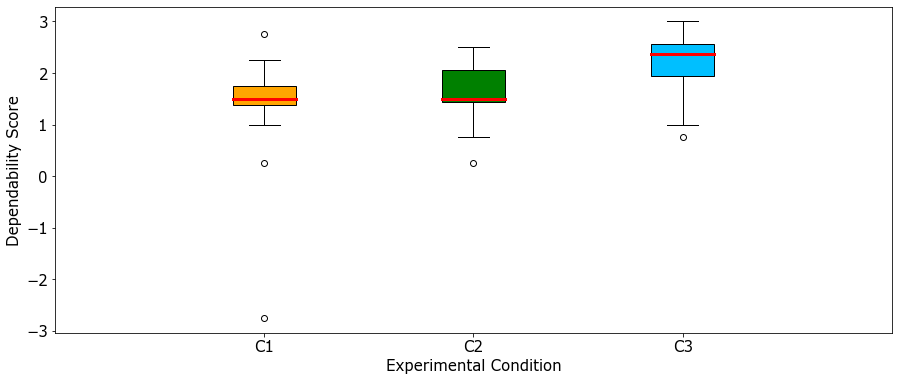

Statistical Results for Dependability score:

F_onewayResult(statistic=6.078358531317492, pvalue=0.0040471926582065585)
-----------
C1 vs C2:
Ttest_indResult(statistic=-1.038978290790407, pvalue=0.15269044194132025)
-----------
C1 vs C3:
Ttest_indResult(statistic=-3.0833405528407716, pvalue=0.0019008117979042026)
-----------
C2 vs C3:
Ttest_indResult(statistic=-3.049241272911269, pvalue=0.002082213769688534)

##################



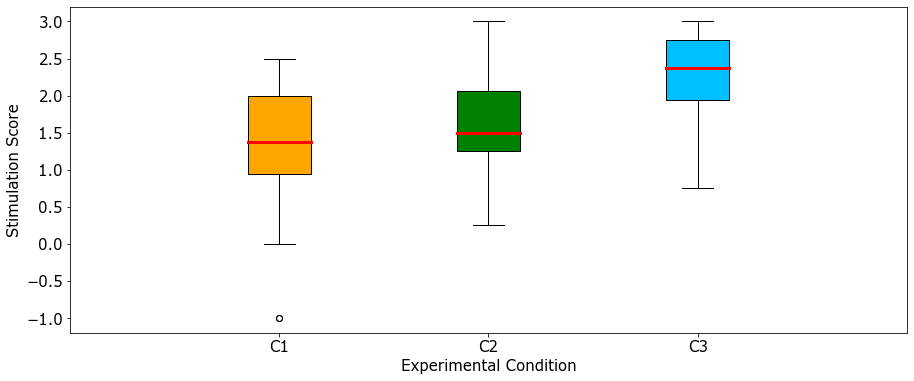

Statistical Results for Stimulation score:

F_onewayResult(statistic=6.893248034530601, pvalue=0.0020837545011486583)
-----------
C1 vs C2:
Ttest_indResult(statistic=-1.1477199378048673, pvalue=0.12912935444002255)
-----------
C1 vs C3:
Ttest_indResult(statistic=-3.6497370835419543, pvalue=0.00039305981159746455)
-----------
C2 vs C3:
Ttest_indResult(statistic=-2.7047946572107446, pvalue=0.005085834854625241)

##################



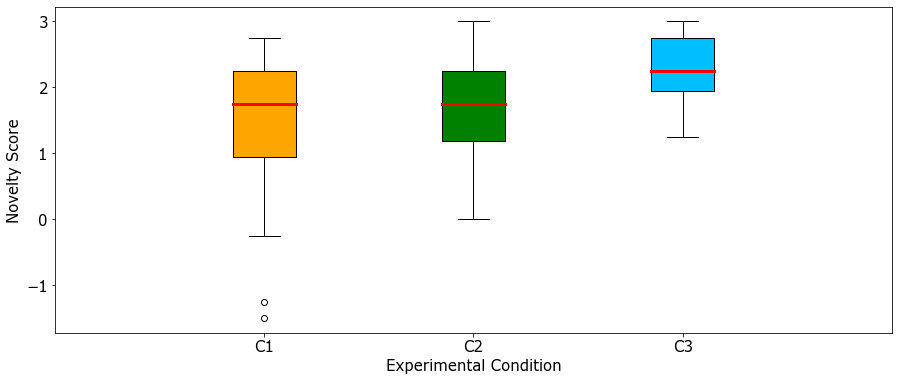

Statistical Results for Novelty score:

F_onewayResult(statistic=5.240509689408018, pvalue=0.008142481936535462)
-----------
C1 vs C2:
Ttest_indResult(statistic=-1.1301607057382332, pvalue=0.13274588954164362)
-----------
C1 vs C3:
Ttest_indResult(statistic=-3.097517479108474, pvalue=0.001829875587615104)
-----------
C2 vs C3:
Ttest_indResult(statistic=-2.496067367585065, pvalue=0.008507108140507681)

##################



In [6]:
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'font.size': 15, 'font.family': 'Verdana'})

groups = list(exp_labels.keys())
colors = {0: "orange", 1: "green", 2: "deepskyblue"}

for j,category in enumerate(categories):
        
    fig = plt.figure(figsize=(15,6))
    plt.ylabel(category + " Score")
    for i in range(len(scale_means_list)):
        boxplot = plt.boxplot(scale_means_list[i][:,j], positions=[(0.5)*i], patch_artist=True)
        boxplot['boxes'][0].set_facecolor(colors[i])
        boxplot['medians'][0].set_linewidth(3)
        boxplot['medians'][0].set_color('red')
        plt.xlabel("Experimental Condition")
        plt.xticks([0, 0.5, 1], groups)
    
    display(fig)
    plt.close()
    
    c1 = scale_means_list[0][:,j]
    c2 = scale_means_list[1][:,j]
    c3 = scale_means_list[2][:,j]
    print("Statistical Results for {0} score:\n".format(category))
    print(f_oneway(c1,c2,c3))
    #print(kruskal(c1,c2,c3))
    print("-----------")
    print("C1 vs C2:")
    print(ttest_ind(c1,c2, alternative="less"))
    #print(wilcoxon(c1,c2, alternative="less"))
    print("-----------")
    print("C1 vs C3:")
    print(ttest_ind(c1,c3, alternative="less"))
    #print(wilcoxon(c1,c3, alternative="less"))
    print("-----------")
    print("C2 vs C3:")
    print(ttest_ind(c2,c3, alternative="less"))
    #print(wilcoxon(c2,c3, alternative="less"))
    
    print("\n##################\n")
    

## Videos Sheet Analysis

In [7]:
stats = pd.read_excel("../Data/Experiments Analysis.xlsx", index_col=None)
print(stats.shape)
stats.head()

(60, 10)


,SUBJECT,EXP. COND. (HOLO),COLLISIONS_H,FAILURES_PICK_H,FAILURES_HANDOVER_H,TIME_H,COLLISIONS_NH,FAILURES_PICK_NH,FAILURES_HANDOVER_NH,TIME_NH
0,1,3,0,0,0,1205,0,0,0,1054
1,2,2,0,1,0,586,1,0,1,640
2,3,3,0,0,1,759,0,0,1,568
3,4,2,0,0,0,811,0,0,0,558
4,5,1,1,1,1,NAN,0,0,0,465


### Collisions Analysis

In [8]:
collisions = stats[['EXP. COND. (HOLO)', 'COLLISIONS_H', 'COLLISIONS_NH']]
collisions = collisions.replace("NAN", np.nan)
collisions = collisions.dropna()

c1 = collisions[collisions['EXP. COND. (HOLO)'] == 1].values
c2 = collisions[collisions['EXP. COND. (HOLO)'] == 2].values
c3 = collisions[collisions['EXP. COND. (HOLO)'] == 3].values

conditions = {"C1": c1, "C2": c2, "C3": c3}

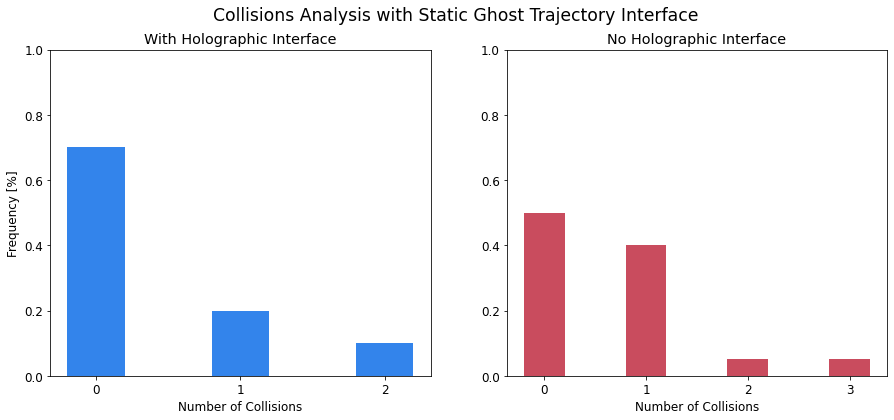

WilcoxonResult(statistic=77.0, pvalue=0.14357370128704078)


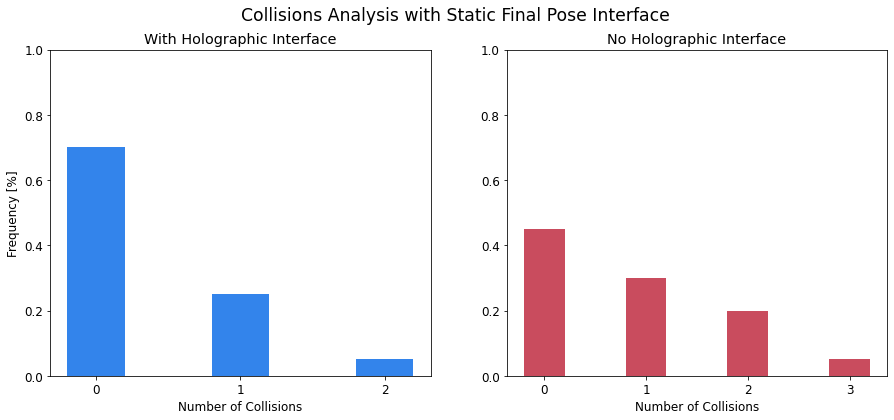

WilcoxonResult(statistic=62.0, pvalue=0.051436406802155804)


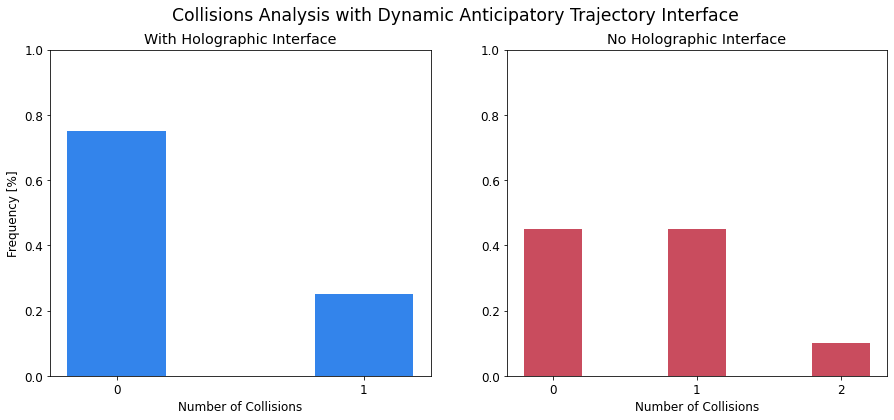

WilcoxonResult(statistic=56.5, pvalue=0.032055922472936565)


In [9]:
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'sans-serif'})

for i,c in enumerate(conditions):
    labels_h, counts_holo = np.unique(conditions[c][:,1], return_counts=True)
    labels_nh, counts_no_holo = np.unique(conditions[c][:,2], return_counts=True)

    f, axs = plt.subplots(1,2,figsize=(15,6))
    st = f.suptitle("Collisions Analysis with {0}".format(exp_labels[c]), fontsize="x-large")

    axs[0].bar(labels_h, counts_holo / len(conditions[c]), align='center', color=(0,0.4,0.9,0.8), width = 0.4)
    axs[0].set_xticks(labels_h)
    axs[0].set_ylim(0,1)
    axs[0].set_title("With Holographic Interface")
    axs[0].set_xlabel("Number of Collisions")
    axs[0].set_ylabel("Frequency [%]")

    axs[1].bar(labels_nh, counts_no_holo / len(conditions[c]), align='center', color=(0.7,0,0.1,0.7), width = 0.4)
    axs[1].set_title("No Holographic Interface")
    axs[1].set_ylim(0,1)
    axs[1].set_xticks(labels_nh)
    axs[1].set_xlabel("Number of Collisions")
    
    display(f)
    plt.close()
    
    print(wilcoxon(x=conditions[c][:,1],y=conditions[c][:,2], alternative="less", zero_method="zsplit"))

### Failures Analysis

#### Pick Failures

In [10]:
pick_failures = stats[['EXP. COND. (HOLO)', 'FAILURES_PICK_H', 'FAILURES_PICK_NH']]
pick_failures = pick_failures.replace("NAN", np.nan)
pick_failures = pick_failures.dropna()

c1 = pick_failures[pick_failures['EXP. COND. (HOLO)'] == 1].values
c2 = pick_failures[pick_failures['EXP. COND. (HOLO)'] == 2].values
c3 = pick_failures[pick_failures['EXP. COND. (HOLO)'] == 3].values


conditions = {"C1": c1, "C2": c2, "C3": c3}

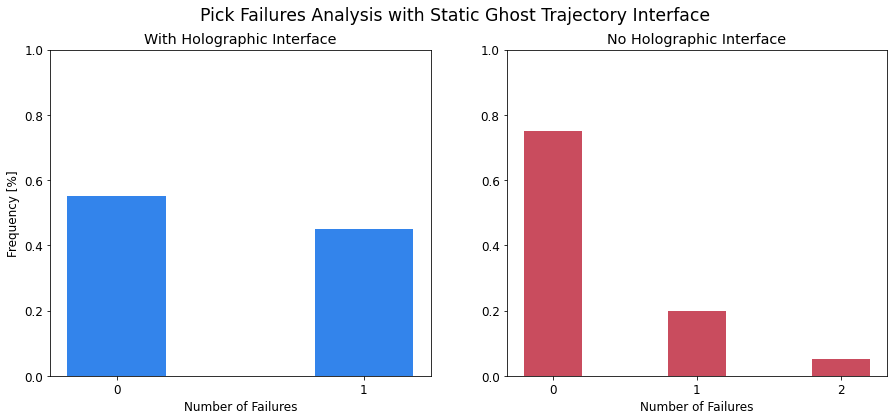

WilcoxonResult(statistic=130.5, pvalue=0.838631141035217)


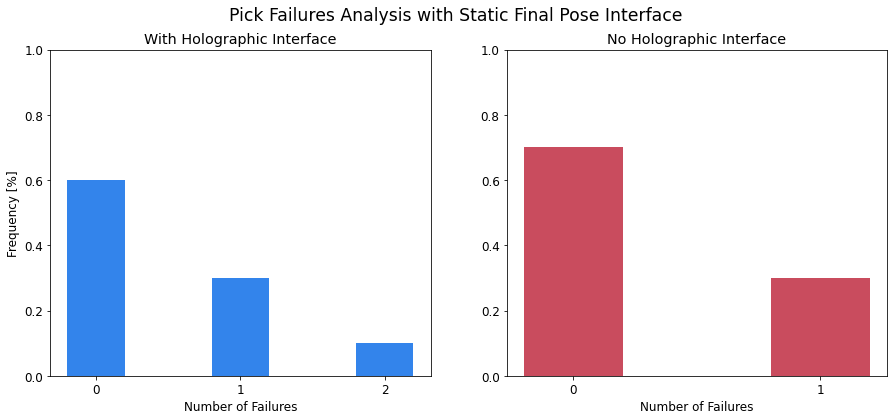

WilcoxonResult(statistic=124.5, pvalue=0.7731640687643403)


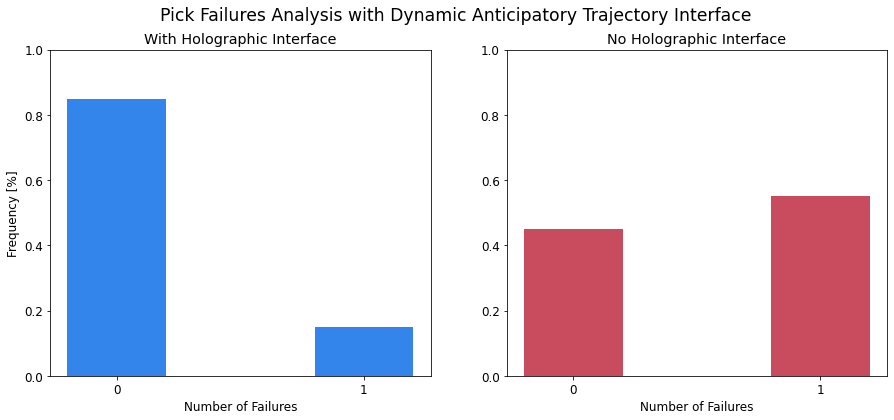

WilcoxonResult(statistic=43.0, pvalue=0.008558740219755681)


In [11]:
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'sans-serif'})

for i,c in enumerate(conditions):
    labels_h, counts_holo = np.unique(conditions[c][:,1], return_counts=True)
    labels_nh, counts_no_holo = np.unique(conditions[c][:,2], return_counts=True)

    f, axs = plt.subplots(1,2,figsize=(15,6))
    st = f.suptitle("Pick Failures Analysis with {0}".format(exp_labels[c]), fontsize="x-large")

    axs[0].bar(labels_h, counts_holo / len(conditions[c]), align='center', color=(0,0.4,0.9,0.8), width = 0.4)
    axs[0].set_xticks(labels_h)
    axs[0].set_ylim(0,1)
    axs[0].set_title("With Holographic Interface")
    axs[0].set_xlabel("Number of Failures")
    axs[0].set_ylabel("Frequency [%]")

    axs[1].bar(labels_nh, counts_no_holo / len(conditions[c]), align='center', color=(0.7,0,0.1,0.7), width = 0.4)
    axs[1].set_title("No Holographic Interface")
    axs[1].set_ylim(0,1)
    axs[1].set_xticks(labels_nh)
    axs[1].set_xlabel("Number of Failures")
    
    display(f)
    plt.close()
    
    print(wilcoxon(x=conditions[c][:,1],y=conditions[c][:,2], alternative="less", zero_method="zsplit"))

#### Handover Failures

In [12]:
hand_failures = stats[['EXP. COND. (HOLO)', 'FAILURES_HANDOVER_H', 'FAILURES_HANDOVER_NH']]
hand_failures = hand_failures.replace("NAN", np.nan)
hand_failures = hand_failures.dropna()

c1 = hand_failures[hand_failures['EXP. COND. (HOLO)'] == 1].values
c2 = hand_failures[hand_failures['EXP. COND. (HOLO)'] == 2].values
c3 = hand_failures[hand_failures['EXP. COND. (HOLO)'] == 3].values

conditions = {"C1": c1, "C2": c2, "C3": c3}

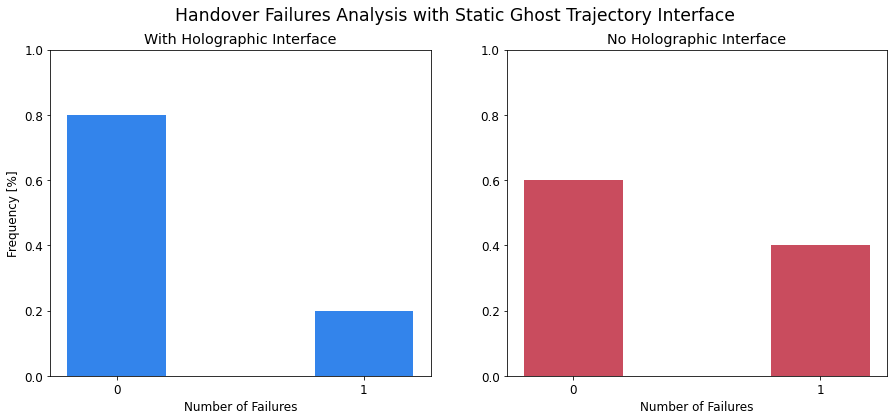

WilcoxonResult(statistic=72.0, pvalue=0.10138246505182458)


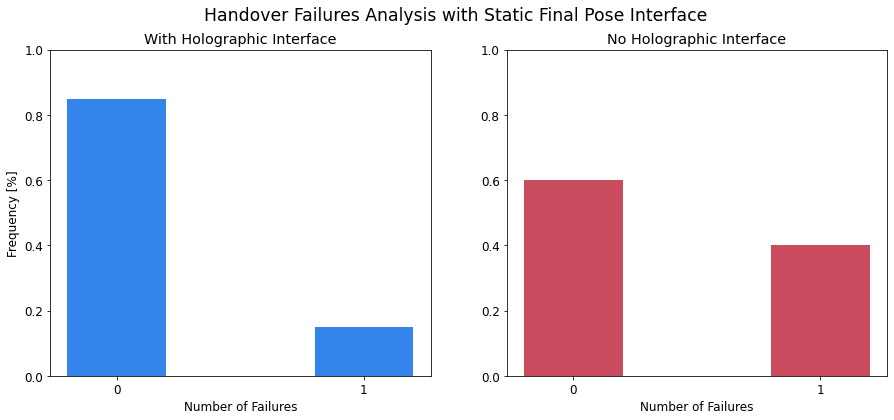

WilcoxonResult(statistic=65.0, pvalue=0.06182885520141673)


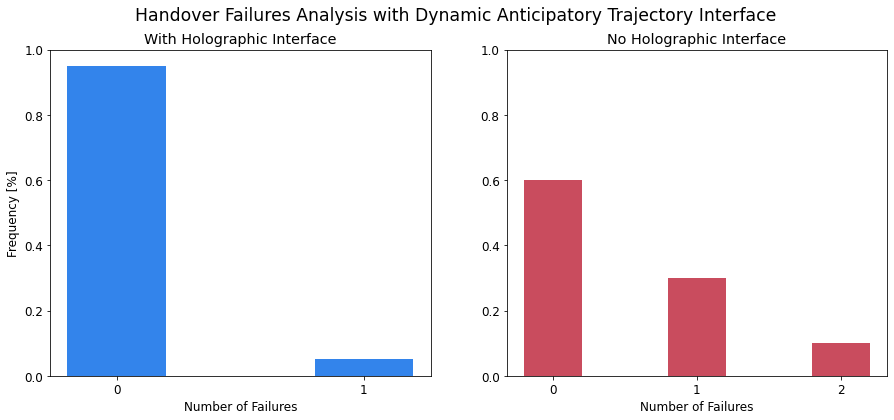

WilcoxonResult(statistic=45.5, pvalue=0.010730954561767574)


In [13]:
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'sans-serif'})

for i,c in enumerate(conditions):
    labels_h, counts_holo = np.unique(conditions[c][:,1], return_counts=True)
    labels_nh, counts_no_holo = np.unique(conditions[c][:,2], return_counts=True)

    f, axs = plt.subplots(1,2,figsize=(15,6))
    st = f.suptitle("Handover Failures Analysis with {0}".format(exp_labels[c]), fontsize="x-large")

    axs[0].bar(labels_h, counts_holo / len(conditions[c]), align='center', color=(0,0.4,0.9,0.8), width = 0.4)
    axs[0].set_ylim(0,1)
    axs[0].set_xticks(labels_h)
    axs[0].set_title("With Holographic Interface")
    axs[0].set_xlabel("Number of Failures")
    axs[0].set_ylabel("Frequency [%]")

    axs[1].bar(labels_nh, counts_no_holo / len(conditions[c]), align='center', color=(0.7,0,0.1,0.7), width = 0.4)
    axs[1].set_title("No Holographic Interface")
    axs[1].set_ylim(0,1)
    axs[1].set_xticks(labels_nh)
    axs[1].set_xlabel("Number of Failures")
    
    display(f)
    plt.close()
    
    print(wilcoxon(x=conditions[c][:,1],y=conditions[c][:,2], alternative="less", zero_method="zsplit"))

#### Combined Failures Analysis

In [14]:
failures = stats[['EXP. COND. (HOLO)']]
failures['FAILURES_H'] = pick_failures['FAILURES_PICK_H'] + hand_failures['FAILURES_HANDOVER_H']
failures['FAILURES_NH'] = pick_failures['FAILURES_PICK_H'] + hand_failures['FAILURES_HANDOVER_NH']

c1 = failures[failures['EXP. COND. (HOLO)'] == 1].values
c2 = failures[failures['EXP. COND. (HOLO)'] == 2].values
c3 = failures[failures['EXP. COND. (HOLO)'] == 3].values

conditions = {"C1": c1, "C2": c2, "C3": c3}

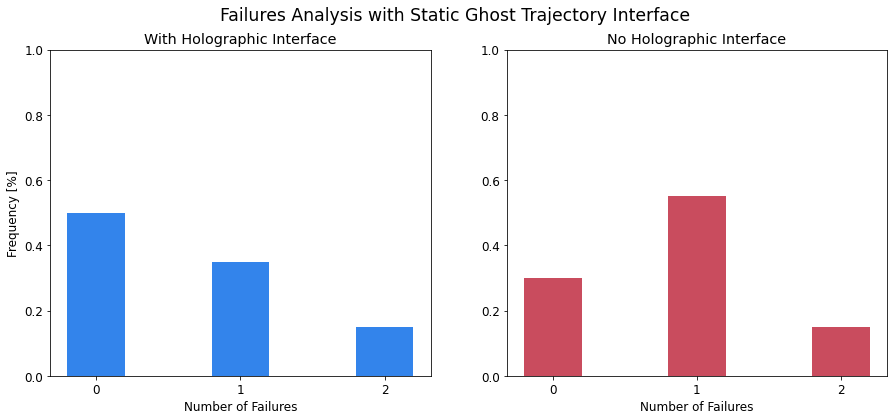

WilcoxonResult(statistic=72.0, pvalue=0.10138246505182458)


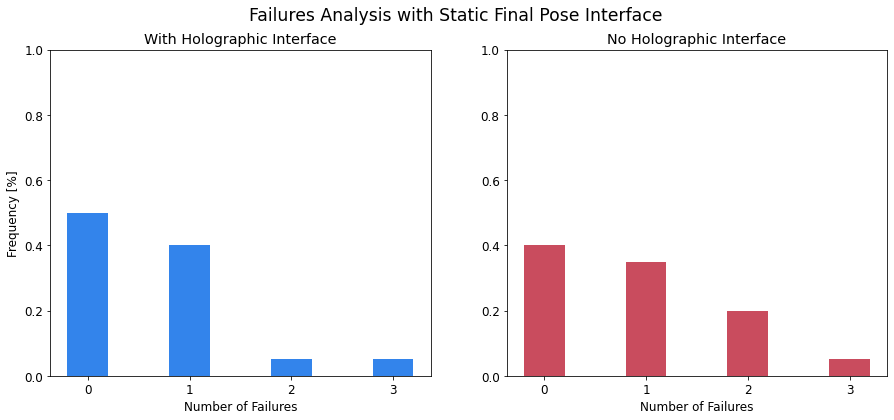

WilcoxonResult(statistic=65.0, pvalue=0.06182885520141673)


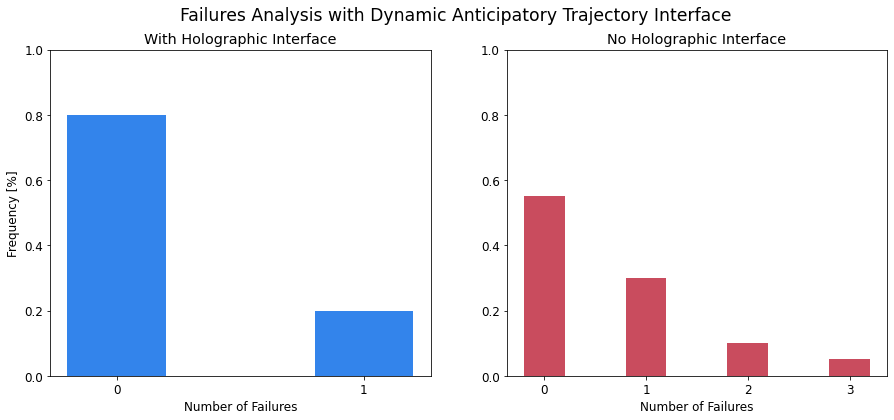

WilcoxonResult(statistic=45.5, pvalue=0.010730954561767574)


In [15]:
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'sans-serif'})

for i,c in enumerate(conditions):
    labels_h, counts_holo = np.unique(conditions[c][:,1], return_counts=True)
    labels_nh, counts_no_holo = np.unique(conditions[c][:,2], return_counts=True)

    f, axs = plt.subplots(1,2,figsize=(15,6))
    st = f.suptitle("Failures Analysis with {0}".format(exp_labels[c]), fontsize="x-large")

    axs[0].bar(labels_h, counts_holo / len(conditions[c]), align='center', color=(0,0.4,0.9,0.8), width = 0.4)
    axs[0].set_ylim(0,1)
    axs[0].set_xticks(labels_h)
    axs[0].set_title("With Holographic Interface")
    axs[0].set_xlabel("Number of Failures")
    axs[0].set_ylabel("Frequency [%]")

    axs[1].bar(labels_nh, counts_no_holo / len(conditions[c]), align='center', color=(0.7,0,0.1,0.7), width = 0.4)
    axs[1].set_title("No Holographic Interface")
    axs[1].set_ylim(0,1)
    axs[1].set_xticks(labels_nh)
    axs[1].set_xlabel("Number of Failures")
    
    display(f)
    plt.close()
    
    print(wilcoxon(x=conditions[c][:,1],y=conditions[c][:,2], alternative="less", zero_method="zsplit"))

### Time Analysis

In [16]:
time = stats[['EXP. COND. (HOLO)', 'TIME_H', 'TIME_NH']]
time = time.replace("NAN", np.nan)
time = time.dropna()

c1 = time[time['EXP. COND. (HOLO)'] == 1].values
c2 = time[time['EXP. COND. (HOLO)'] == 2].values
c3 = time[time['EXP. COND. (HOLO)'] == 3].values

conditions = {"C1": c1, "C2": c2, "C3": c3}

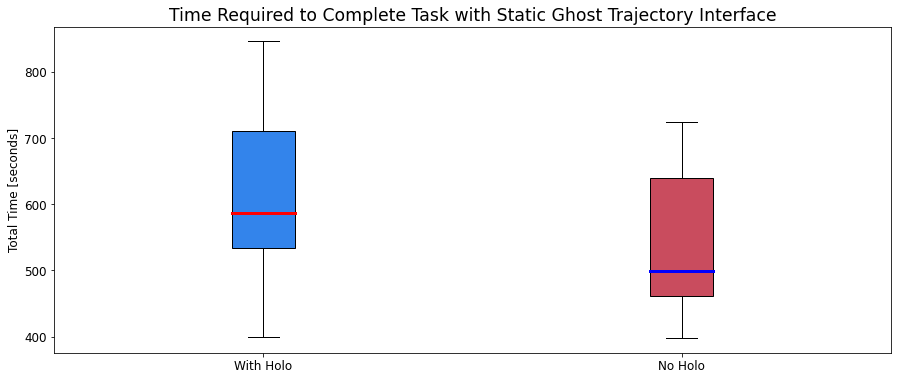

WilcoxonResult(statistic=118.0, pvalue=0.9752816890606255)


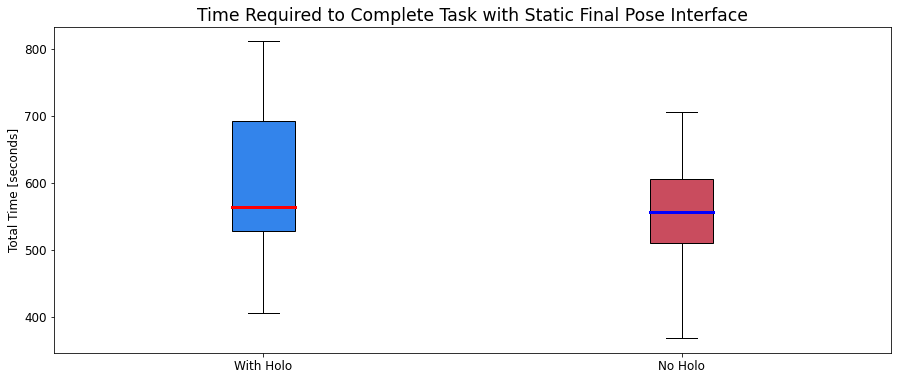

WilcoxonResult(statistic=115.5, pvalue=0.9043105233705527)


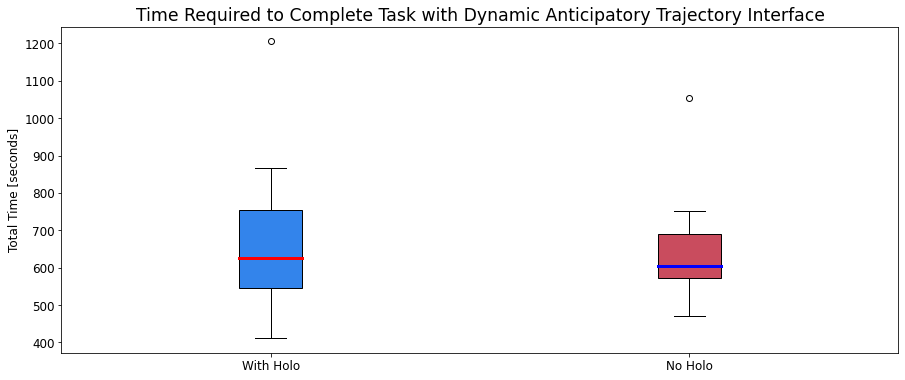

WilcoxonResult(statistic=101.5, pvalue=0.7524604797363281)


In [17]:
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'sans-serif'})

for i,c in enumerate(conditions):
    labels_h, counts_holo = np.unique(conditions[c][:,1], return_counts=True)
    labels_nh, counts_no_holo = np.unique(conditions[c][:,2], return_counts=True)

    f = plt.figure(figsize=(15,6))
    plt.title("Time Required to Complete Task with {0}".format(exp_labels[c]), fontsize="x-large")

    boxplot = plt.boxplot(conditions[c][:,1], positions=[0], patch_artist=True)
    boxplot['boxes'][0].set_facecolor((0,0.4,0.9,0.8))
    boxplot['medians'][0].set_linewidth(3)
    boxplot['medians'][0].set_color('red')
    
    boxplot = plt.boxplot(conditions[c][:,2], positions=[1], patch_artist=True)
    boxplot['boxes'][0].set_facecolor((0.7,0,0.1,0.7))
    boxplot['medians'][0].set_linewidth(3)
    boxplot['medians'][0].set_color('blue')
    
    plt.ylabel("Total Time [seconds]")
    plt.xticks([0, 1], ["With Holo", "No Holo"])
    
    display(f)
    plt.close()
    
    print(wilcoxon(x=conditions[c][:,1],y=conditions[c][:,2], alternative="less", zero_method="zsplit"))

#### Time Diff Analysis

In [18]:
time['TIME_DIFF'] = time['TIME_H'] -  time['TIME_NH']

c1 = time[time['EXP. COND. (HOLO)'] == 1].values
c2 = time[time['EXP. COND. (HOLO)'] == 2].values
c3 = time[time['EXP. COND. (HOLO)'] == 3].values

conditions = {"C1": c1, "C2": c2, "C3": c3}

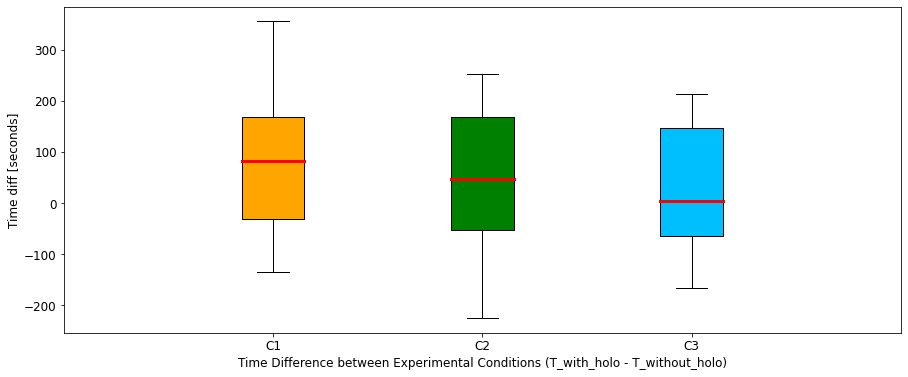

In [19]:
groups = list(exp_labels.keys())
colors = {0: "orange", 1: "green", 2: "deepskyblue"}

fig = plt.figure(figsize=(15,6))

for i,c in enumerate(conditions.keys()):
        
    boxplot = plt.boxplot(conditions[c][:,3], positions=[(0.5)*i], patch_artist=True)
    boxplot['boxes'][0].set_facecolor(colors[i])
    boxplot['medians'][0].set_linewidth(3)
    boxplot['medians'][0].set_color('red')
    

plt.xlabel("Time Difference between Experimental Conditions (T_with_holo - T_without_holo)")
plt.ylabel("Time diff [seconds]")
plt.xticks([0, 0.5, 1], groups)
display(fig)

plt.close()